3it [00:00, 17.40it/s]


saved


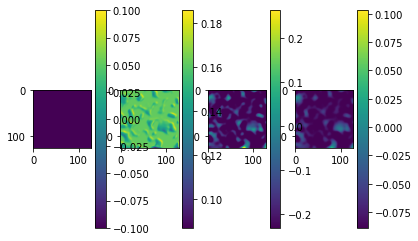

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
#Plot to show the learned embeddings and generated sequences for various models
emb = np.load('/home/sanjeevr/noether/eval_metrics/embeddings_past2_fut2_train100_val20_lr0.0001_bs5-lr0.0001-steps1.npy', allow_pickle=True)
gen_seq = np.load('/home/sanjeevr/noether/eval_metrics/genseq_past2_fut2_train100_val20_lr0.0001_bs5-lr0.0001-steps1.npy', allow_pickle=True)
fig, ax = plt.subplots(1, 4)

# Store the plot handle at each time step in the 'ims' list
ims = []
for i, e in tqdm(enumerate(emb)):
    e = np.reshape(e[0].detach().cpu(), (2,128, 128))
    im1 = ax[0].imshow(e[0], animated=True)
    im2 = ax[1].imshow(e[1], animated=True)
    im3 = ax[2].imshow(gen_seq[i][0][0].detach().cpu(), animated=True)
    im4 = ax[3].imshow(gen_seq[i][0][1].detach().cpu(), animated=True)
    if i == 0:
        ax[0].imshow(e[0])
        ax[1].imshow(e[1])
        ax[2].imshow(gen_seq[i][0][0].detach().cpu())
        ax[3].imshow(gen_seq[i][0][1].detach().cpu())
        fig.colorbar(im1, ax=ax[0])
        fig.colorbar(im2, ax=ax[1])
        fig.colorbar(im3, ax=ax[2])
        fig.colorbar(im4, ax=ax[3])
    ims.append([im1, im2, im3, im4])

# Animate the plot
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

writer = animation.PillowWriter(fps=15, bitrate=1800)
ani.save("/home/sanjeevr/noether/movie.gif", writer=writer)
print("saved")

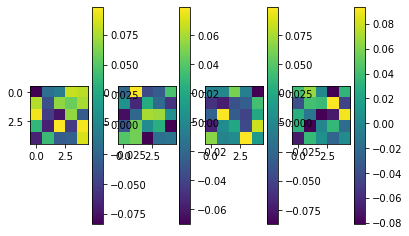

In [49]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#Plot to show the weights of the filters of the learned convolutional embedding
%matplotlib inline
ckpt = torch.load('/home/sanjeevr/noether/results/2d_reacdiff_convemb2/past2_fut20_train100_val20_lr0.00001_bs1/model_80.pth')
_opt = ckpt['opt']

fig, ax = plt.subplots(1, 4)
svg_model = ckpt['svg_model']

svg_model.cuda()
emb = svg_model.emb
for i, param in enumerate(emb.parameters()):
    if i==0:
        
        im1 = ax[0].imshow(param[10][0].detach().cpu())
        im2 = ax[1].imshow(param[10][1].detach().cpu())
        im3 = ax[2].imshow(param[10][2].detach().cpu())
        im4 = ax[3].imshow(param[10][3].detach().cpu())
        fig.colorbar(im1, ax=ax[0])
        fig.colorbar(im2, ax=ax[1])
        fig.colorbar(im3, ax=ax[2])
        fig.colorbar(im4, ax=ax[3])
        
plt.show()

